In [1]:
library(glmnet)

Warning message:
"package 'glmnet' was built under R version 3.6.2"Loading required package: Matrix
Loaded glmnet 3.0-2



# Load data

Set up the folders that contains data.

In [16]:
c_folder_name = 'NIH/Emotion'
type = 'GRCCA'

Load questionnaires, connectome and variance explained data.

In [17]:
c = read.table(paste('Data/Connectome/', c_folder_name, '/Adjust/c_adj.csv', sep = ''), sep = ',', header = TRUE, row.names = 1)
brain_scores = read.table(paste('Data/Connectome/', c_folder_name, '/', type, '/brain_scores.csv', sep = ''), sep = ',', header = TRUE, row.names = 1)

# Sparse coefficients

Pick brain score.

In [27]:
score_num = 1
score_name = 'first'
#score_num = 2
#score_name = 'second'

Run Lasso for brain_score~questionnaires.

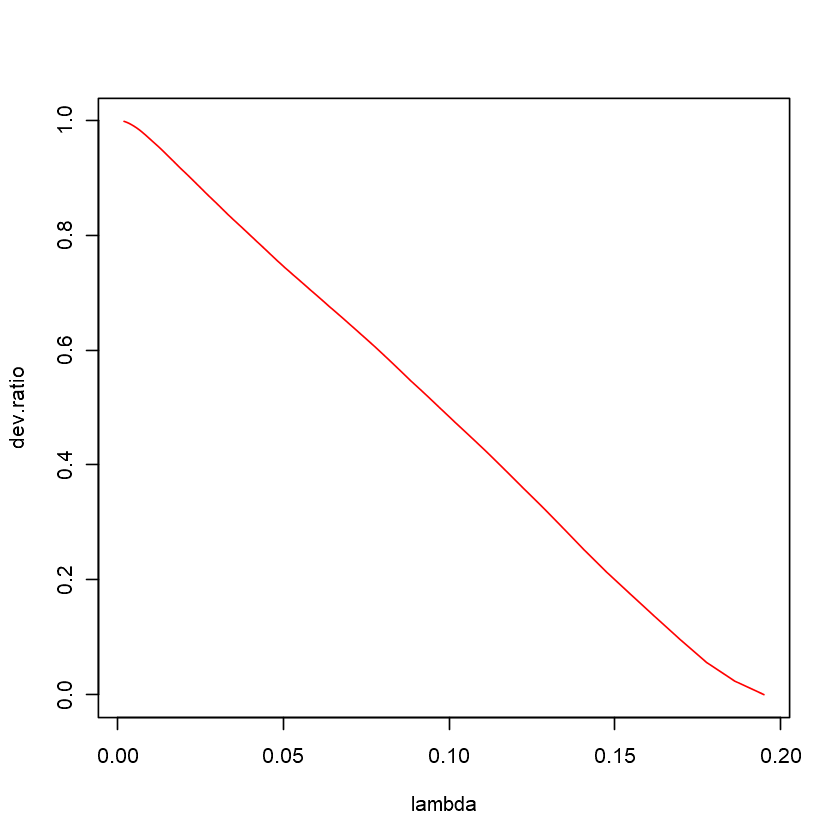

In [28]:
model_lasso = glmnet(y = as.matrix(brain_scores)[,score_num], x = as.matrix(c), family = 'gaussian', standardize.response = TRUE, standardize = TRUE, alpha = 1, intercept = FALSE)
plot(model_lasso$lambda, model_lasso$dev.ratio, type = 'l', col = 'red', xlab = 'lambda', ylab = 'dev.ratio')

In [29]:
lambda_opt = model_lasso$lambda[min(which(model_lasso$dev.ratio>=0.9))]
coefs = coef(model_lasso, s = lambda_opt)
nonzero_pairs = rownames(coefs)[which(coefs != 0)]
cat('# lasso nonzero components = ', length(nonzero_pairs))
brain_scores_lasso = as.matrix(c[,nonzero_pairs])%*%as.matrix(coefs[nonzero_pairs,])
write.csv(data.frame('c_pair' = rownames(coefs)[-1], 'RCCA1' = coefs[-1,]), file = paste('Data/Connectome/', c_folder_name, '/', type, '/Sparse version for visualization/alpha_', score_name,'_lasso.csv', sep = ''), row.names = FALSE)
write.csv(data.frame('Subject' = rownames(brain_scores_lasso), brain_scores_lasso), file = paste('Data/Connectome/', c_folder_name, '/', type, '/Sparse version for visualization/brain_score_', score_name,'_lasso.csv', sep = ''), row.names = FALSE)

# lasso nonzero components =  225

Run Elastic Net for brain_score~questionnaires.

In [30]:
model_elastic = glmnet(y = as.matrix(brain_scores)[,score_num], x = as.matrix(c), family = 'gaussian', standardize.response = TRUE, standardize = TRUE, alpha = 0.5, intercept = FALSE)

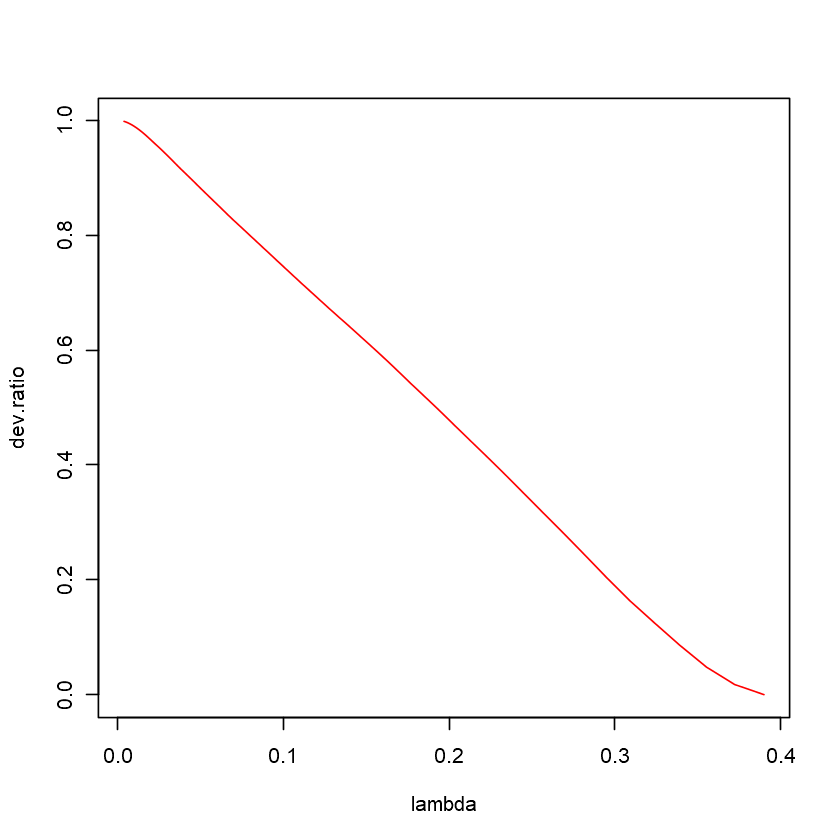

In [31]:
plot(model_elastic$lambda, model_elastic$dev.ratio, type = 'l', col = 'red', xlab = 'lambda', ylab = 'dev.ratio')

In [32]:
lambda_opt = model_elastic$lambda[min(which(model_elastic$dev.ratio>=0.9))]
coefs = coef(model_elastic, s = lambda_opt)
nonzero_pairs = rownames(coefs)[which(coefs != 0)]
cat('# elastic nonzero components = ', length(nonzero_pairs))
brain_scores_elastic = as.matrix(c[,nonzero_pairs])%*%as.matrix(coefs[nonzero_pairs,])
write.csv(data.frame('c_pair' = rownames(coefs)[-1], 'RCCA1' = coefs[-1,]), file = paste('Data/Connectome/', c_folder_name, '/', type, '/Sparse version for visualization/alpha_', score_name,'_elasticnet.csv', sep = ''), row.names = FALSE)
write.csv(data.frame('Subject' = rownames(brain_scores_elastic), brain_scores_elastic), file = paste('Data/Connectome/', c_folder_name, '/', type, '/Sparse version for visualization/brain_score_', score_name,'_elasticnet.csv', sep = ''), row.names = FALSE)

# elastic nonzero components =  256